In [15]:
def pulse_s(t):
    import scipy as sp
    Amp = 1
    betap = -100
    tau0 = 4.66
    gamma = 1/tau0
    beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
    omega_s = 3.24
    Tau = tau0**2*(1+betap**2 * gamma**4)
    shape = Amp*sp.exp(-1*(t**2)/Tau)
    return shape*sp.cos(omega_s*t + 0.5 *1* beta*t**2)

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pandas as pd
power = 12
tot_num = 2**power
t_tot_num = 2**(power-4)
boundary = int(tot_num/4)
times = np.linspace(-40,40,t_tot_num)
output_time = []
output_frequency = []
output_signal = []
temp_result = [0]*tot_num
tim = times + 40
freq = np.linspace(0,40, boundary)
maxout = 0

for time in times:
    cur_result = []
    def compul(tau):
        return pulse_s(time+0.5*tau) * np.conj(pulse_s(time-0.5*tau))
    taus = np.linspace(-2500,2500,tot_num)
    taustep = 3000/(tot_num-1)
    #comval = compul(taus)
    comval = [compul(ttau) for ttau in taus]
    cur_result = np.fft.fft(comval)
    cur_result = np.abs(cur_result)
    for i in range(tot_num):
        if i < tot_num/2 :
            temp_result[i + int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
        else:
            temp_result[i - int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
    output_signal.extend(list(temp_result[:boundary]))
    maxout = max(temp_result[:boundary]) if max(temp_result[:boundary])>maxout else maxout
    #if max(abs(cur_result[:boundary])) > maxout: maxout = max(output_signal)
#print(maxout)
#print(output_signal.index(max(output_signal)))
output_signal = np.reshape(np.array(output_signal)/maxout, (t_tot_num, boundary))
#freq, tim = np.meshgrid(freq, tim)

tim,freq = np.meshgrid(tim,freq)

output_signal = output_signal.transpose()


(1024, 256) (1024, 256)
(256, 1024)
(1024, 256)


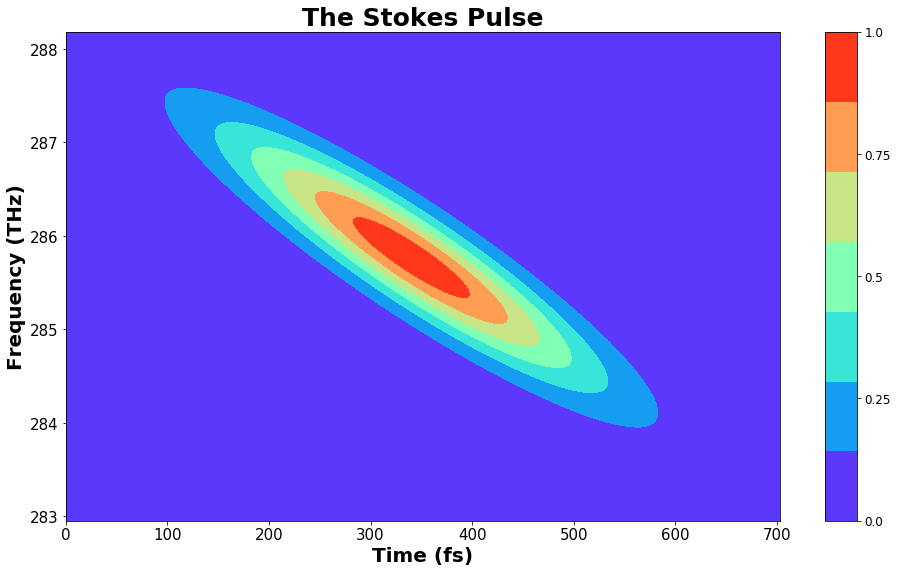

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
plt.yticks(np.arange(10.178,30,3.822), (283,284,285,286,287,288))
plt.xticks(np.linspace(10,71.73,8), (0,100,200,300,400,500,600,700))
plt.ylim((10,30))
plt.xlim((10,72))
surf = plt.contourf(tim,freq,output_signal, cmap=plt.get_cmap('rainbow'))
plt.ylabel('Frequency (THz)', fontsize = 20,weight = 'semibold')
plt.xlabel('Time (fs)', fontsize = 20,weight = 'semibold')
plt.title("The Stokes Pulse",fontsize = 25,weight = 'bold')
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)

cbar = fig.colorbar(surf, ticks=np.linspace(0,1.05,5), shrink=1, aspect=15)
cbar.ax.set_yticklabels(np.linspace(0,1,5),fontsize = 12)
    

plt.savefig('wignerstokes.pdf');

In [36]:
def pulse_p(t):
    import scipy as sp
    Amp = 1
    betap = -100
    tau0 = 4.66
    gamma = 1/tau0
    beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
    if t<0:
        alpha = -1*beta
    else:
        alpha = beta
    omega_s = 3.24
    Tau = tau0**2*(1+betap**2 * gamma**4)
    shape = Amp*sp.exp(-1*(t**2)/Tau)
    return shape*sp.cos(omega_s*t + 0.5 *1* alpha*t**2)
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pandas as pd
power = 12
tot_num = 2**power
t_tot_num = 2**(power-4)
boundary = int(tot_num/4)
times = np.linspace(-40,40,t_tot_num)
output_time = []
output_frequency = []
output_signal = []
temp_result = [0]*tot_num
tim = times + 40
freq = np.linspace(0,40, boundary)
maxout = 0

for time in times:
    cur_result = []
    def compul(tau):
        return pulse_p(time+0.5*tau) * np.conj(pulse_p(time-0.5*tau))
    taus = np.linspace(-2500,2500,tot_num)
    taustep = 3000/(tot_num-1)
    #comval = compul(taus)
    comval = [compul(ttau) for ttau in taus]
    cur_result = np.fft.fft(comval)
    cur_result = np.abs(cur_result)
    for i in range(tot_num):
        if i < tot_num/2 :
            temp_result[i + int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
        else:
            temp_result[i - int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
    output_signal.extend(list(temp_result[:boundary]))
    #maxout = max(temp_result[:boundary]) if max(temp_result[:boundary])>maxout else maxout
    #if max(abs(cur_result[:boundary])) > maxout: maxout = max(output_signal)
#print(maxout)
#print(output_signal.index(max(output_signal)))
maxout = max(output_signal)
output_signal = np.reshape(np.array(output_signal)/maxout, (t_tot_num, boundary))
tim,freq = np.meshgrid(tim,freq)

output_signal = output_signal.transpose()

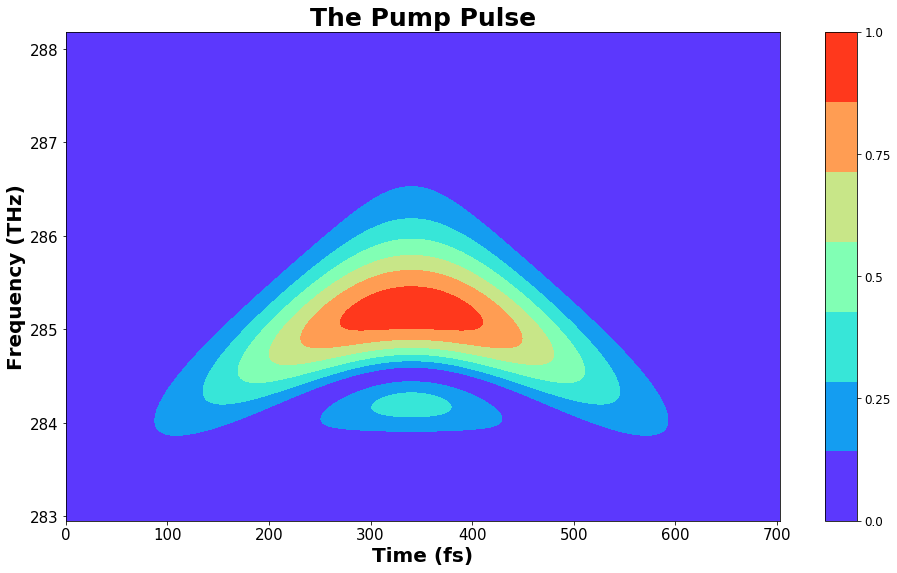

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
plt.yticks(np.arange(10.178,30,3.822), (283,284,285,286,287,288))
plt.xticks(np.linspace(10,71.73,8), (0,100,200,300,400,500,600,700))
plt.ylim((10,30))
plt.xlim((10,72))
surf = plt.contourf(tim,freq,output_signal, cmap=plt.get_cmap('rainbow'))
plt.ylabel('Frequency (THz)', fontsize = 20,weight = 'semibold')
plt.xlabel('Time (fs)', fontsize = 20,weight = 'semibold')
plt.title("The Pump Pulse",fontsize = 25,weight = 'bold')
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)

cbar = fig.colorbar(surf, ticks=np.linspace(0,1.05,5), shrink=1, aspect=15)
cbar.ax.set_yticklabels(np.linspace(0,1,5),fontsize = 12)


plt.savefig('wignerpump.pdf');

In [38]:
def pulse_pr(t):
    import scipy as sp
    Amp = 1
    betap = -100
    tau0 = 4.66
    gamma = 1/tau0
    beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
    if t<0:
        alpha = -1*beta
    else:
        alpha = beta
    omega_s = 3.24
    ggamma = beta - alpha
    Tau = tau0**2*(1+betap**2 * gamma**4)
    shape = Amp*sp.exp(-1*(t**2)/Tau)
    return shape*sp.cos(omega_s*t + 0.5 *1* ggamma*t**2)
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pandas as pd
power = 12
tot_num = 2**power
t_tot_num = 2**(power-4)
boundary = int(tot_num/4)
times = np.linspace(-40,40,t_tot_num)
output_time = []
output_frequency = []
output_signal = []
temp_result = [0]*tot_num
tim = times + 40
freq = np.linspace(0,40, boundary)
maxout = 0

for time in times:
    cur_result = []
    def compul(tau):
        return pulse_pr(time+0.5*tau) * np.conj(pulse_pr(time-0.5*tau))
    taus = np.linspace(-2500,2500,tot_num)
    taustep = 3000/(tot_num-1)
    #comval = compul(taus)
    comval = [compul(ttau) for ttau in taus]
    cur_result = np.fft.fft(comval)
    cur_result = np.abs(cur_result)
    for i in range(tot_num):
        if i < tot_num/2 :
            temp_result[i + int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
        else:
            temp_result[i - int(tot_num/2)] = cur_result[i] if abs(cur_result[i]) > 1e-5 else 0
    output_signal.extend(list(temp_result[:boundary]))
    #maxout = max(temp_result[:boundary]) if max(temp_result[:boundary])>maxout else maxout
    #if max(abs(cur_result[:boundary])) > maxout: maxout = max(output_signal)
#print(maxout)
#print(output_signal.index(max(output_signal)))
maxout = max(output_signal)
output_signal = np.reshape(np.array(output_signal)/maxout, (t_tot_num, boundary))
#freq, tim = np.meshgrid(freq, tim)
tim,freq = np.meshgrid(tim,freq)
output_signal = output_signal.transpose()

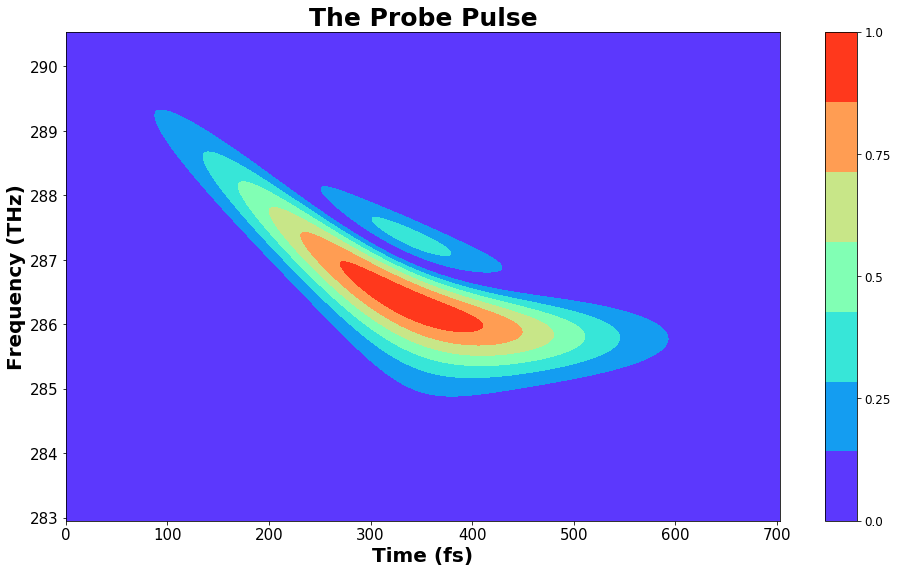

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
plt.yticks(np.arange(6.356,45,3.822), (282,283,284,285,286,287,288,289,290,291,292))
plt.xticks(np.linspace(10,71.73,8), (0,100,200,300,400,500,600,700))
plt.ylim((10,39))
plt.xlim((10,72))
surf = plt.contourf(tim,freq,output_signal, cmap=plt.get_cmap('rainbow'))
plt.ylabel('Frequency (THz)', fontsize = 20,weight = 'semibold')
plt.xlabel('Time (fs)', fontsize = 20,weight = 'semibold')
plt.title("The Probe Pulse",fontsize = 25,weight = 'bold')
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)

cbar = fig.colorbar(surf, ticks=np.linspace(0,1.05,5), shrink=1, aspect=15)
cbar.ax.set_yticklabels(np.linspace(0,1,5),fontsize = 12);

plt.savefig('wignerprobe.pdf');

In [12]:
np.arange(6.356,45,3.822)

array([  6.356,  10.178,  14.   ,  17.822,  21.644,  25.466,  29.288,
        33.11 ,  36.932,  40.754,  44.576])